In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


class Sigmoid():
    def __init__(self,w,b):
        self.w = w
        self.b = b
        
    def set_param(self,w,b):
        self.w = w
        self.b = b
        
    def predict(self,x):
        return 1/(1+np.exp(-(np.dot(x,self.w)+self.b)))

    @staticmethod
    def loss(y,y_hat):
        return -(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    

def display_results(): 
    print(f'Weights and biases = {W*100//1/100} + {b*100//1/100}')
    print(f'y_hat = {y_hat*100//1/100}')
    print(f'Loss is = {loss*10//1/10}')
    
    
def trainning_iterate(sigmoid):
    global W
    global y_hat
    global loss
    global y
    global b
    y_hat = sigmoid.predict(X)
    loss = np.mean(sigmoid.loss(y,y_hat))
    W -= alpha*np.dot(X,(y_hat-y))
    b -= alpha*np.mean(y_hat-y)
    sigmoid.set_param(W,b)    

    
X = np.array([[5,5,-5],[1,1,1],[2,2,2]])
W = np.array([1,-1.,-1])

y = np.array([0,1,1])
b = 0
sigmoid = Sigmoid(W,b)
sigmoid.set_param(W,b)

alpha = 0.001

y_hat = sigmoid.predict(X)
loss = sigmoid.loss(y,y_hat).mean()


print(f'y = {y*100//1/100}',end='\n\n')

display_results()
I = 1000
for i in range(I):
    trainning_iterate(sigmoid)
    
print(f'\n\nResults after {I} Iterations => \n')
display_results()


y = [0. 1. 1.]

Weights and biases = [ 1. -1. -1.] + 0.0
y_hat = [0.99 0.26 0.11]
Loss is = 2.8


Results after 1000 Iterations => 

Weights and biases = [-0.25 -0.02  0.97] + 0.32
y_hat = [0.   0.73 0.85]
Loss is = 0.1


## Forward propagation in multi input examples:
- In below example we will try to define a random neural network with 2 layers 4,1 neurons in inside the layers.
- 3 testing samples will be calculated at once using Vectorization techniques

In [2]:

def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return tf.math.maximum(z,np.zeros(z.shape))

def leaky_relu(z):
    return tf.math.maximum(0.01*z,z)

def linear(z):
    return z


def forward_prob(X,W,b,activation=sigmoid):
    b = b.reshape((W.shape[0],)+(1,))
    z = np.dot(X,W.T)+b.T
    a = activation(z)
    return a


X = np.array([[-5,1,-0.5],
              [1,1,1],
              [-5,-5,-5]])

W1 = np.array([[5,1,1],
               [0,0,0],
               [0,1,1],
               [0,0,0]])

W2 = np.array([[-1,0,1,0]])

b1 = np.array([0,1,0,0])

b2 = np.array([1])


a1 = forward_prob(X,W1,b1, activation = relu)
a2 = forward_prob(a1,W2,b2,activation=leaky_relu)
a2

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[ 1.5 ],
       [-0.04],
       [ 1.  ]])>

## Trainning Neural Network using Backward Propagation with multiple trainning examples.

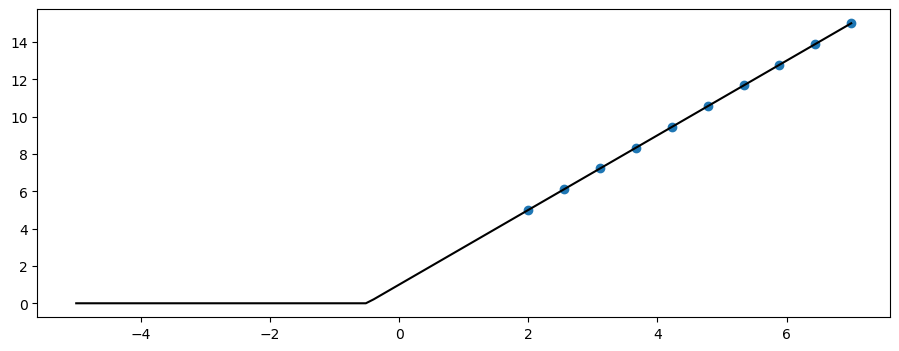

In [3]:
# Visualize our data points

def g(X):
    return X*2+1

X = np.linspace(2,7,10)
y = g(X)

z = np.linspace(-5,7,100)


plt.figure(figsize=(11,4))
plt.scatter(X,y)
plt.plot(z,relu(g(z)), c='k')
plt.show()

In [69]:
class Layer():
    def __init__(self,units=1,activation=relu):
        self.units = units
        self.activation = activation
        
    def fit(self,X,y,epochs=5):
        n_features = X.shape[1]
        W = np.random.rand(self.units,n_features)
        b = np.random.rand(self.units)
        
        for _ in range(epochs):
            z = np.dot(X,W.T)+b        
            a = self.activation(z)
            y = y.reshape(a.shape)
            dw = ((a-y)*X).mean(axis=0)
            db = ((a-y)).mean(axis=0)
            W = W - 0.01*dw
            b = b - 0.01*db
        
        self.W = W
        self.b = b
        
        
    def predict(X):
        pass
    
    @staticmethod
    def loss(X,y):
        return 
        
X = np.expand_dims(np.linspace(2,7,10),1)
X = np.concatenate((X,X),axis=1)
y = g(X).mean(axis=1)

model = Layer(1,sigmoid)
model.fit(X,y,epochs=5) 